In [22]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
import seaborn as sns

In [23]:
# Import dataframe and drop null values
df=pd.read_csv('energy_demand.csv')
df.dropna(inplace=True)

# Change Dates to Date time and Extract Years, Months
df['date']=pd.to_datetime(df['date'], errors='ignore', format='%Y%m%d')
df['year']=pd.DatetimeIndex(df['date']).year
df['month']=pd.DatetimeIndex(df['date']).month

In [24]:
# Removing the Outliers
from scipy.stats import iqr

percentile75 = df['price'].quantile(0.75)
upper_limit_proce = percentile75 + 1.5 * iqr(df['price'])
df = df[df['price'] < upper_limit_proce]

In [25]:
# Creating weekend of holiday, 1=yes, 0=no
df['weekend_holiday']=0
df['weekend_holiday']=np.where(((df['school_day']=='N')& (df['holiday']=='Y')),1,df['weekend_holiday'])

# Creating Season Variable
#make a season variable
df['season']=3
df['season']=np.where(df['month']==1 ,'Summer', df['season'])
df['season']=np.where(df['month']==2 ,'Summer', df['season'])
df['season']=np.where(df['month']==3 ,'Autumn', df['season'])
df['season']=np.where(df['month']==4 ,'Autumn', df['season'])
df['season']=np.where(df['month']==5 ,'Autumn', df['season'])
df['season']=np.where(df['month']==6 ,'Winter', df['season'])
df['season']=np.where(df['month']==7 ,'Winter', df['season'])
df['season']=np.where(df['month']==8 ,'Winter', df['season'])
df['season']=np.where(df['month']==9 ,'Spring', df['season'])
df['season']=np.where(df['month']==10 ,'Spring', df['season'])
df['season']=np.where(df['month']==11,'Spring', df['season'])
df['season']=np.where(df['month']==12, 'Summer' ,df['season'])

In [26]:
ndf=df[['date', 'price', 'demand_pos_price', 'price_positive',
       'demand_neg_price', 'price_negative', 'frac_neg_price',
       'min_temperature', 'max_temperature','solar_exposure', 
        'rainfall','weekend_holiday','demand']]

In [27]:
import datetime

ndf = ndf.set_index('date')
ndf.index = pd.to_datetime(ndf.index)
ndf.dropna(inplace=True)
ndf.sort_index(inplace=True)

# Highlights

<p>Looking ahead into over the next 18 months, prices are expected to rebound from 2020's average price of 47.87AUD. 

<p>Average electricity prices have decreased from 2017-2020. and will likely remain low

<p>Energy prices vary by season. They are generally higher during the winter and lower during the summer.

<p>Instances of negative prices are higher during transitional seasons

<p>It appears that investing in energy storage devices such as batteries would be wise, and could generate approximately $6,300 AUD in revenue yearly. The industry is shifting towards storing excess solar energy in batteries, so investing in batteries seems like a prudent choice.

# Introduction

Energy Prices
Australia’s energy market is in a state of flux; with the shift towards clean energy sources, the introduction of new government regulations, the Covid-19 pandemic, and technological changes all acting to alter Australia’s energy generation landscape. Against this backdrop, a downtrend in average energy prices has been observed. 

As seen in figure 1.1 below. Average electricity prices per year plummeted in 2019, when the Government of Australia introduced a price cap (i.e. a limit on the maximum electricity prices offered to customers) <a href="#footnote-1">[1]</a> , and continue to fall into 2020 as the Covid-19 pandemic reduced demand for electricity among commercial users. 

<p id="footnote-1">[1] https://www.energy.gov.au/government-priorities/energy-programs/price-safety-net</p>

Text(0.5, 1.0, 'Average Electricity Prices Comparison 2015-2020')

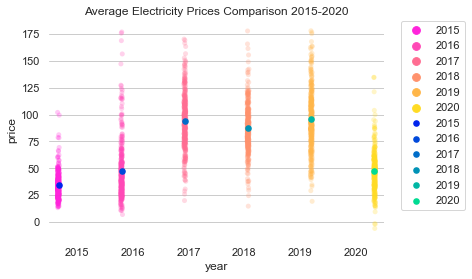

In [28]:
# Seasonal Analysis

summer=df.groupby('season')[['max_temperature']].mean()

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)
# Defining style
sns.set_theme(style="whitegrid")
ax.set_facecolor('white')

# Show each observation with a scatterplot
sns.stripplot(x="year", y="price", hue="year",
              data=df, palette="spring",dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(x="year", y="price", hue="year",
              data=df, dodge=0.97 - .97 / 3,
              join=False, palette="winter",
              markers="o", scale=.75, ci=None)

# Improve the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="species",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_title('Average Electricity Prices Comparison 2015-2020')

Taking a closer look at the month over month data for 2018, 2019 and 2020 in figure 1.2 below, the decrease in prices is readily identifiable. However, a seasonal component can also be observed, with energy prices decreasing in the summer months (December, January and February) and peaking during the winter (June and July).


In [29]:
#I need to work with these columns
graphing=df[['date','year','month','frac_neg_price','price','demand']]
graphing=graphing.set_index('date')

In [30]:
# Slicing the dataframe for only 3 years
graphing_p=graphing.loc['2015-01-01':'2020-10-10']

# Grouping data for graphine
monthly = (graphing_p.groupby([graphing_p.year, graphing_p.month])
           .mean()
           .rename_axis(index=['year', 'month'],)
           .reset_index())

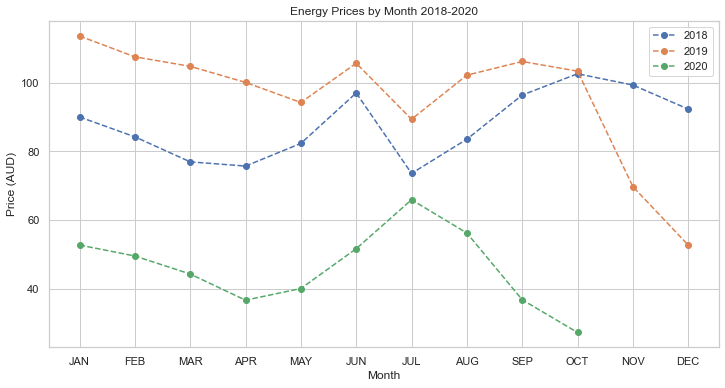

In [31]:
import matplotlib as matplotlib
import matplotlib.pyplot as plt
# make figure
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
#2d343a
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

# plotting for one year
years=(2018,2019,2020)
for year in years:
    sub = monthly[monthly['year'] == year]
    ax.plot(sub['month'], sub['price'], label=year, marker='o',linestyle='--'),

# some formatting
ax.set_title('Energy Prices by Month 2018-2020')
ax.set_ylabel('Price (AUD)')
ax.set_xlabel('Month')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
ax.legend()
ax.grid('black')

… The impact of seasonality can be more easily seen in the graph below, which shows higher prices during the coldest season(winter), lowest prices during the hottest season (summer) and intermediate prices during the transitional seasons (spring and autumn).


In [32]:
#make a season variable
df['season2']=0
df['season2']=np.where(df['season']=='Autumn' ,'Transitional', df['season2'])
df['season2']=np.where(df['season']=='Summer' ,'Hottest', df['season2'])
df['season2']=np.where(df['season']=='Winter' ,'Coldest', df['season2'])
df['season2']=np.where(df['season']=='Spring' ,'Transitional', df['season2'])

Text(0, 0.5, 'Price(AUD)')

<Figure size 432x288 with 0 Axes>

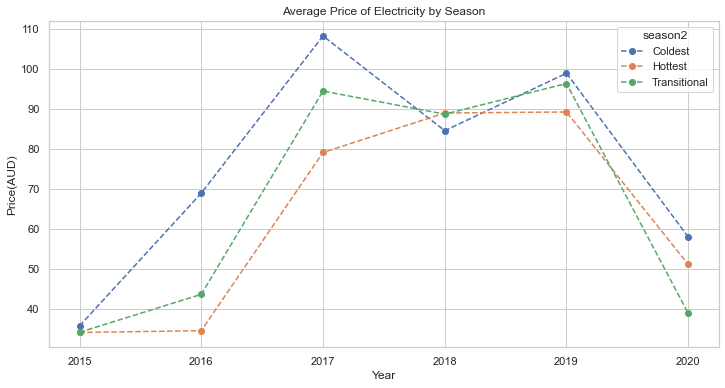

In [33]:
plt.rcParams['axes.facecolor'] = 'white'
fig = plt.figure()
fig.patch.set_facecolor('white')

pivot = pd.crosstab(values=df['price'], 
index=df['year'], 
columns=df['season2'], 
aggfunc=np.mean)

pivot.plot(kind='line',label=year, marker='o',linestyle='--',figsize=(12,6))

# some formatting
plt.grid('black')
plt.title('Average Price of Electricity by Season')
plt.xlabel("Year")
plt.ylabel("Price(AUD)")

Turning to negative pricing, the fraction of the day at which energy sells for negative prices has, on average, increased in 2020 and has sky rocketed since July 2020 -with no clear seasonal trend. 


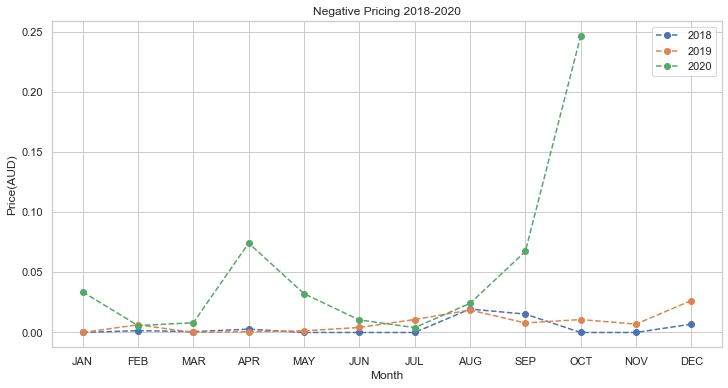

In [34]:
# make figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

# plotting for one year
years=(2018,2019,2020)
for year in years:
    sub = monthly[monthly['year'] == year]
    ax.plot(sub['month'], sub['frac_neg_price'], label=year,marker='o',linestyle='--')

# some formatting
ax.set_title('Negative Pricing 2018-2020')
ax.set_ylabel('Price(AUD)')
ax.set_xlabel('Month')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
ax.legend()
ax.grid('black')

Electricity is traded at negative prices in instances of oversupply. The uptrend over 2020 may be due to the covid-19 pandemic, as previously mentioned, decreasing demand among commercial users –the chart below shows a decrease in demand beginning in July. 


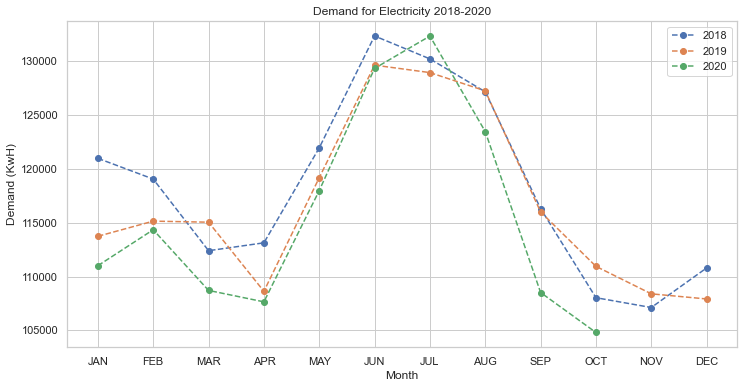

In [35]:
import matplotlib.pyplot as plt
# make figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

# plotting for one year
years=(2018,2019,2020)
for year in years:
    sub = monthly[monthly['year'] == year]
    ax.plot(sub['month'], sub['demand'], label=year,marker='o',linestyle='--')

# some formatting
ax.set_title('Demand for Electricity 2018-2020')
ax.set_ylabel('Demand (KwH)')
ax.set_xlabel('Month')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
ax.legend()
ax.grid('black')

However, demand and the proportion of the day that prices are negative is only weekly correlated (r=-0.19), which suggests that additional forces are at work. 

Indeed, negative prices over this time-period can be explained by the increase in the amount of low-cost renewable energy being produced at times of low demand. Since new legislation has been introduced to prevent electricity generators from slowing production during times of oversupply  <a href="#footnote-1">[2]</a>, this is a trend that we can expect to see carry forward into the short-term, until the mass adoption of energy storage devices.

In terms of seasonality, from 2019 to present, the fraction of the day where prices are negative appears to be higher during transitional seasons (fall and spring).

<p id="footnote-1">[2] https://www.aer.gov.au/system/files/State%20of%20the%20energy%20market%202021%20-%20Full%20report_1.pdf</p>

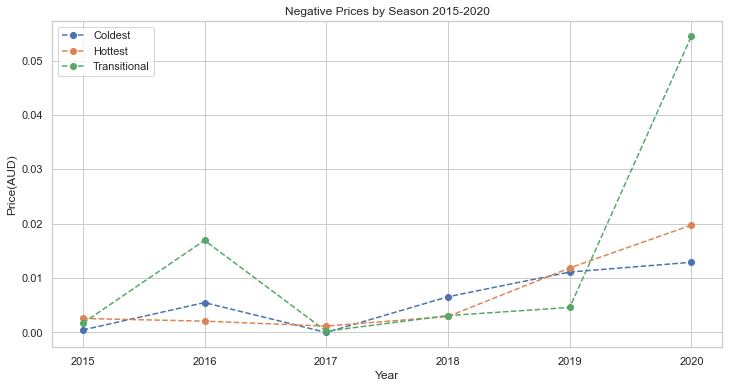

In [36]:
import matplotlib.pyplot as plt

pivot = pd.crosstab(values=df['frac_neg_price'], 
index=df['year'], 
columns=df['season2'], 
aggfunc=np.mean)

pivot=pivot.plot(kind='line',label=year, marker='o',linestyle='--',figsize=(12,6))

# some formatting
plt.grid('black')
plt.title('Negative Prices by Season 2015-2020')
plt.xlabel("Year")
plt.ylabel("Price(AUD)")
plt.legend()

# Part 2: Forcasting

A simple SARIMAX(Seasonal Autoregressive moving average) time series model was fitted to the data in order to provide a rough estimate of the short-term energy prices in Australia. 

An advantage of the SARIMAx model is that it allows for seasonal effects (that were shown in part 1) as well as for exogenous variables to be fitted (in this case, demand, minimum temperature, maximum temperature, solar exposure, and rainfall).

In addition, a new variable, ‘weekend_holiday’, was created as a combination of the ‘school day’ and ‘holiday’ categorical variables. As the name suggests, weekend_holiday distinguishes between a weekend/holiday and a weekday. It is a binary variable and is coded as 1 if the day was a weekend/holiday and 0 otherwise, and was added to the list of exogenous variables. 

Next, outliers (values greater than Q3 + 1.5 (IQR)) were removed. And the model was finetuned. The final model was a SARIMAX(2,0,1) x (1,1,1,12). With parameters ‘time_varying_regression’ set to true and ‘mle_regression’ set to false. The model was trained on data from ‘2015-01-01’ to ‘2019-12-31’ and was tested using the most recent period of ‘2020-01-01’ to ‘2020-10-06’. This was done to avoid overfitting. 

As seen below, the model was not able to predict the severity of the trough in 2020, and therefore, did not perform well during evaluation, with an RMSE of 31.98 and a bias of -22.77. This result is not surprising since 2020 was an unusual year economy wide. More information could be fed into the model to perform its performance for future iterations. Or more sophisticated time series analysis could be utilized such as artificial neural networks. 

In [37]:
df_modeling=df[['date', 'price', 'demand_pos_price', 'price_positive',
       'demand_neg_price', 'price_negative', 'frac_neg_price',
       'min_temperature', 'max_temperature','solar_exposure', 
        'rainfall','weekend_holiday','demand']]

df_modeling = df_modeling.set_index('date')
df_modeling.index = pd.to_datetime(df_modeling.index)
df_modeling.dropna(inplace=True)
df_modeling.sort_index(inplace=True)

In [38]:
# Splitting Data for test and train
train=df_modeling.loc['2015-01-01':'2020-01-31']
test=df_modeling.loc['2020-02-01':'2020-10-06']

In [39]:
# Setting the index
train.index = pd.DatetimeIndex(train.index).to_period('D')
test.index = pd.DatetimeIndex(test.index).to_period('D')

In [40]:
import statsmodels.api as sm
import warnings
import statsmodels.api as sm
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Defining the Model
warnings.simplefilter('ignore', ConvergenceWarning)

model=sm.tsa.statespace.SARIMAX(train['price'],
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1,12),
                                exog=train.iloc[:,6:],
                                time_varying_regression=True,
                                mle_regression=False)
res= model.fit(disp=False)

In [44]:
# Defining exogenous data
exog=train.iloc[:,6:]
exog_test=test.iloc[:,6:]

# Forcasting out of sample data
forecast = res.forecast(249, exog=exog_test)

In [45]:
actual= df_modeling['price'].loc['2020-01-01':'2020-10-04']

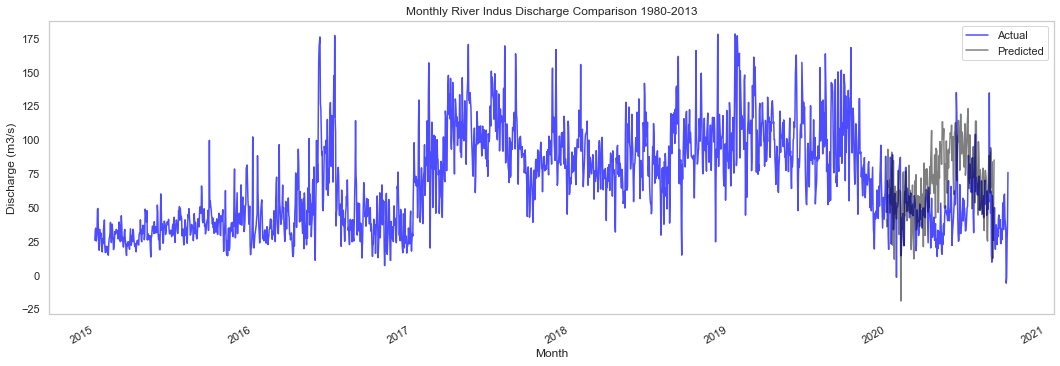

In [46]:
import matplotlib.pyplot as plt

# Plot actual vs Predictions
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,6))

df_modeling['price'].plot(color='#4D4DFF')
forecast.plot(color='black',alpha=0.5)

plt.grid()
plt.title('Monthly River Indus Discharge Comparison 1980-2013')
plt.ylabel('Discharge (m3/s)')
plt.xlabel('Month')
plt.legend(['Actual', 'Predicted'])

In [47]:
# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
# Defining Variables
y = test['price']
y_hat = forecast

# Calculating RMSE
mse = mean_squared_error(y, y_hat)
rmse = sqrt(mse)

#Forecast Bias
forecast_errors = [y[i]-y_hat[i] for i in range(len(y))]
bias = sum(forecast_errors) * 1.0/len(y)

print('Bias: %f' % bias)
print('RMSE: %f' % rmse)

Bias: -22.768022
RMSE: 31.984187


The predicted prices are shown below.

In [27]:
# Out of sample predictions
# Defining exogenous data
exog=df_modeling.iloc[:,6:]
exog=exog.loc['2018-08-14':'2019-12-31']

# Forcasting out of sample data
forecast = res.forecast(487, exog=exog)

In [21]:
# Make sure index is datatime
#forecast.index = pd.DatetimeIndex(forecast.index).to_period('D')

TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead

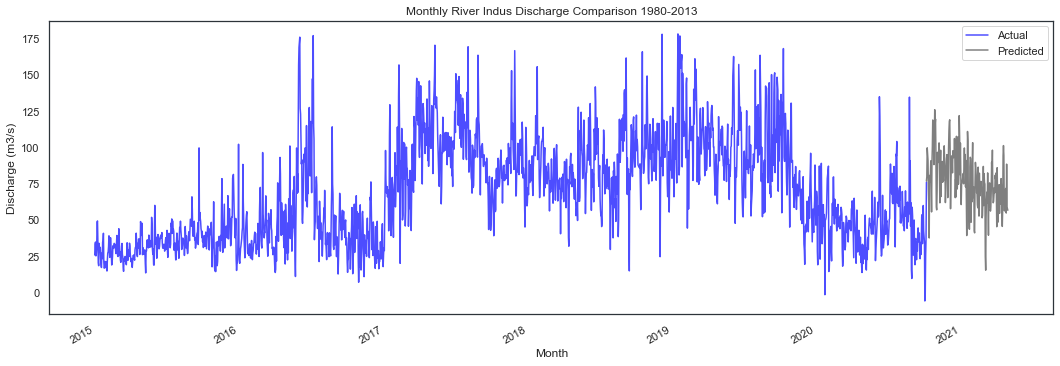

In [124]:
# Degining sclice to use as the focasting data
forecast_graph=forecast['2020-10-06':'2021-04-30']
# Degining variables
actual_2=df_modeling['price']
predicted=forecast_graph
# Plotting Figures
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,6))
actual_2.plot(color='#4D4DFF',linestyle='-')
predicted.plot(color='black',linestyle='-',alpha=0.5)

plt.grid()
plt.title('Monthly River Indus Discharge Comparison 1980-2013')
plt.ylabel('Discharge (m3/s)')
plt.xlabel('Month')
plt.legend(['Actual', 'Predicted'])

In [99]:
from tabulate import tabulate

print(tabulate({'Forcasted Average Price': [70.4367],
                'Forcasted Maximum Price': [137.662],
                'Forcasted Minimum Price': [-5.745]}, 
               headers="keys", tablefmt='fancy_grid', missingval='N/A'))

╒═══════════════════════════╤═══════════════════════════╤═══════════════════════════╕
│   Forcasted Average Price │   Forcasted Maximum Price │   Forcasted Minimum Price │
╞═══════════════════════════╪═══════════════════════════╪═══════════════════════════╡
│                   70.4367 │                   137.662 │                    -5.745 │
╘═══════════════════════════╧═══════════════════════════╧═══════════════════════════╛


Looking ahead into over the next 18 months, prices are expected to rebound from 2020's average price of 47.87AUD. However, it at an average of 70.44 AUD, prices are still significantly lower than the average from 2017-2019.

Text(0, 0.5, 'Price(AUD)')

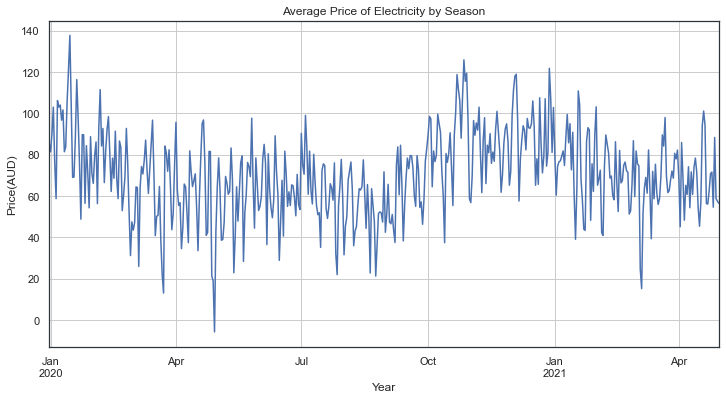

In [111]:
plt.rcParams['axes.facecolor'] = 'white'
fig = plt.figure()
fig.patch.set_facecolor('white')

forecast.plot(kind='line',label=year, linestyle='-',figsize=(12,6))

# some formatting
plt.grid('black')
plt.title('Average Price of Electricity by Season')
plt.xlabel("Year")
plt.ylabel("Price(AUD)")

<p>Of Course, these predictions assume that no new exogenous shocks will influence the energy market, in today’s precarious energy landscape, this may not be a realistic assumption. However, the results of the forecasting may shed some light as to short-term pricing. 

# Part 2: Energy Storage Analysis

As low-cost production of renewable energy increases, so to will the instances of negative prices. Indeed, relying on historical trends, the proportion of the day at which electricity is traded at negative prices is expected to increase over the short-term. Since energy producers can not decrease production during periods of negative pricing, battery storage will become increasingly important in the upcoming years to help smooth electricity prices. Luckily, technological advances has made storing energy in batteries more and more accessible.
In determining the amount of revenue, the energy storage venture could generate per year, we will use historical data from 2019-10-06 to 2020-10-06, and will make several assumptions about energy generation capacity and energy production.

According to our analysis (please see the full details below) out of the total 245025KWH that would be sold at negative prices in one year, 6300KWH could be stored and sold at higher prices (or 0.03% ). 

Therefore, within a year the amount of revenue such a system could make is $6,300.0AUD in one year from one 70KWH battery. 
 
<B>Step 1: Convert Megajoules per square meter, to Kilowatt hours per square foot</B>
<li>Action: Multiplying solar exposure in megajoules by 0.27777
 <br>   
<B>Step 2: Determine the amount of energy captured by a single solar panel</B>
<li>Action: Multiplying the solar exposure by 20% 
<li>Assumption: Solar panels are 20% efficient, and measure 1 square meter 
 <br>   
<B>Step 3: Determine the total amount of solar energy generated per day</B>
<li>Action: Multiplying the amount of energy captured by 30,000 
<li>Assumption: It is an average sized soal farm with 30,000 solar panels 
 <br>   
    <B>Step 4: Determine the amount of energy generated that will be sold at negative prices per day</B>
<li>Action: Multiply the total amount of solar energy captured by the fraction of the day at which prices are negative
<li>Assumption: The amount of energy generated per hour is constant.
 <br>   
    <B>Step 5: Determine the amount of energy generated that can be stored</B>
<li>Action: Store 70 KWH in cases where the amount of energy generated exceeds 70 KWH. Store all of the energy generated in cases where the total amount of energy generated per day is less than 70 KWH.
 <br>   
    <B>Step 6: Calculate Revenue </B>
<li>Action: Multiply the amount of energy stored by the positive price for energy, and calculate the sum of money received during the year
<li>Assumption: Since prices are positive at some point during the day, the stored energy will always be able to be sold within the same day.



In [94]:
df3=ndf.loc['2019-10-06':'2020-10-06']

# Creating new variables
df3['KWH/SQfoot']= df3['solar_exposure']*0.2777
df3['solar_captured']=df3['KWH/SQfoot']*0.20
df3['total_solar_generated']=df3['solar_captured']*30000
df3['solar_neg_price']=df3['total_solar_generated']*df3['frac_neg_price']

# determining the amount of energy that can be stored
df3['energy_stored']=100
df3['energy_stored']=np.where((df3['solar_neg_price']<=70),df3['solar_neg_price'],df3['energy_stored'])
df3['energy_stored']=np.where((df3['solar_neg_price']>70),70,df3['energy_stored'])
# The average amount stored over the year
amount_stored=df3['energy_stored'].sum()

print('The amount of energy stored in Kwh is:', amount_stored)    

The amount of energy stored in Kwh is: 6300.0


# Summary

<p>Looking ahead into over the next 18 months, prices are expected to rebound from 2020's average price of 47.87AUD. However, it at an average of 70.44 AUD, prices are still significantly lower than the average from 2017-2019.

<p>Average electricity prices have decreased from 2017-2020. This is due to several factors, including government regulation, the shift towards clean energy generation and the covid-19 pandemic. While it seems likely that the impacts of the covid-19 pandemic will abate in the near future, the influx of clean energy sources, government regulations, and technological changes will likely continue to exert downward pressure on energy prices.

<p>Energy prices vary by season. They are generally higher during the winter and lower during the summer. However, more extreme temperatures are expected in the near future due to climate change. This would likely push prices higher.

<p>The influx of clean energy has resulted in excess supply and has pushed prices to negative values. This trend will likely cause the instances of negative pricing to increase in the short-run, before widespread adoption of energy storage devices.

<p>Macroeconomic shocks will cause uncertainty for future energy price forecasts. The current model appears to be unable to account for the impacts of the recent changes in the energy market. Inorder to improve the model, more information about the supply of energy (as well as a break down of the source of energy generation) will likely be needed. Additionally, more advanced techniques such as artificial neural networks could be implemented in order to improve forecasts.

<p>It appears that investing in energy storage devices such as batteries would be wise, as it would allow for excess energy to be stored for sale during periods of positive prices. Currently with a 70KWH battery system, $6,300 AUD could be generated in one year. Information about the costs of the battery would be needed before conclusions can be drawn about the profitability of the project, however, considering the shift in the industry towards storing excess solar energy in batteries, it seems like a prudent choice.
